# AI Model Development and Operationalization

- Design ML System with a 7-Step Framework
- What to know on Cloud for LLMs? AWS, Azure or GCP
- Model Development Lifecycle
- On-premise vs Cloud - AWS, Azure, GCP
- Roadmap for designing a recommendation system
- Operationalizing ML models and challenges
- [Case Study] - Amazon Recommendation System
- Model Quantization & Pruning

### Design ML System with a 7-Step Framework

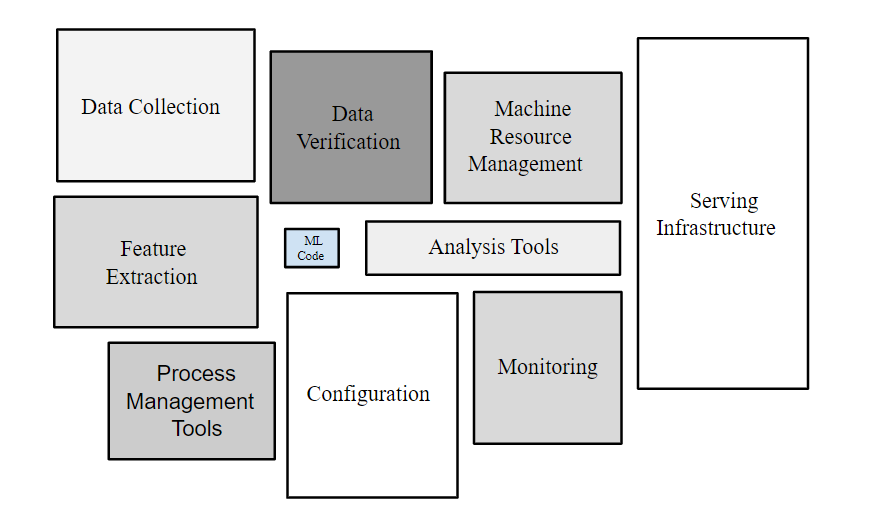

get the detailed section here:

https://github.com/hemansnation/AI-ML-MLOps-GenAI-Live-Summer-Cohort-2024/blob/main/Module%2011%20-%20ML%20System%20Design/12_13_7%20Step%20Framework%20to%20build%20an%20ML%20System%20and%20Visual%20Search%20System.ipynb

### What to know on Cloud for LLMs? AWS, Azure or GCP


In [ ]:
AWS

- Experiment LLMs
    - SageMaker - ML workflow
    - AWS Deep Learning Containers and DL AMIs(Amazon Machine Images)
    - Pretained models and SageMaker Jumpstart
    
- Deployment and productionizing LLMs
    - SageMaker Endpoints
    - Elastic Inference and Amazon EC2 Inf1 Instance
    - AWS Lambda and Amazon Bedrock

In [ ]:
Azure

- Experiment LLMs
    - Azure OpenAI service
    - Azure ML
    - Azure Cognitive Services
- Deployment and productionizing LLMs
    - Azure Container Instances
    - Azure Kubernetes Service

In [ ]:
GCP

- Experiment LLMs
    - VertexAI
    - IDE
    - AI and ML libraries
- Deployment and productionizing LLMs
    - VertexAI Prediction
    - Google Kubernetes Engine(GKE)

### Model Development Lifecycle

- Define objectives
    - what type of data you have - text, images, audio?
    - what level accuracy is required?

- Data collection and preprocessing
    - openAI API, Google dataset search
    - tools: HuggingFace
- Model selection and architecture Design
    - text - GPT, BERT, LLama,
    - images - GANs, Stable Diffusion
    - Audio - WaveNet, Tacotron
- Training the model
    - tensorflow, pytorch, huggingface transformers
- Evaluation and fine-tuning
    - text - BLEU, Perplexity
    - images - FID(FREchet Inception Distance)
    
- Integration and deployment
    - ONNX
    - fastAPI
- Monitoring and iteration
    - prometheus, grafana

In [ ]:
GAN example: https://thispersondoesnotexist.com/

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer

dataset = load_dataset("wikipedia", "20220301.en", split="train[:1%]")

tokenizer = AutoTokenizer.from_pretrained("gpt2")

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

In [ ]:
from transformers import GPT2LMHeadModel

model = GPT2LMHeadModel.from_pretrained("gpt2")

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=4,
    num_train_epochs=3,
    save_steps=1000,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
)

trainer.train()

In [ ]:
from fastapi import FastAPI
from transformers import pipeline

app = FastAPI()

text_generator = pipeline("text-generation", model="gpt2")

@app.post("/generate")
def generate_text(prompt: str):
    return text_generator(prompt, max_length=50, num_return_sequences=1)

### On-premise vs Cloud - AWS, Azure, GCP


In [ ]:
1 - infrastructure cost
2 - scalability
3 - performance
4 - data security
5 - maintenance
6 - time to deployment

### Roadmap for designing a recommendation system

dataset link: https://www.kaggle.com/datasets/shubhammehta21/movie-lens-small-latest-dataset

In [ ]:
import pandas as pd
from surprise import Dataset, SVD
from surprise.model_selection import cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from flask import Flask, request, jsonify
from sklearn.metrics import mean_squared_error
from math import sqrt

ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")
data = pd.merge(ratings, movies, on="movieId")

data = Dataset.load_builtin("ml-100k")
model = SVD()
cross_validate(model, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(movies["genres"])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

def recommend(title, cosine_sim=cosine_sim):
    idx = movies[movies["title"] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    movie_indices = [i[0] for i in sim_scores]
    return movies["title"].iloc[movie_indices]

def calculate_rmse(predictions, ground_truth):
    return sqrt(mean_squared_error(predictions, ground_truth))

predictions = [4.0, 3.5, 5.0]
ground_truth = [5.0, 3.0, 4.0]
print("RMSE:", calculate_rmse(predictions, ground_truth))

app = Flask(__name__)

@app.route("/recommend", methods=["GET"])
def recommend_movies():
    title = request.args.get("title")
    recommendations = recommend(title)
    return jsonify(recommendations.tolist())

if __name__ == "__main__":
    app.run(debug=True)

### [Case Study] - Amazon Recommendation System

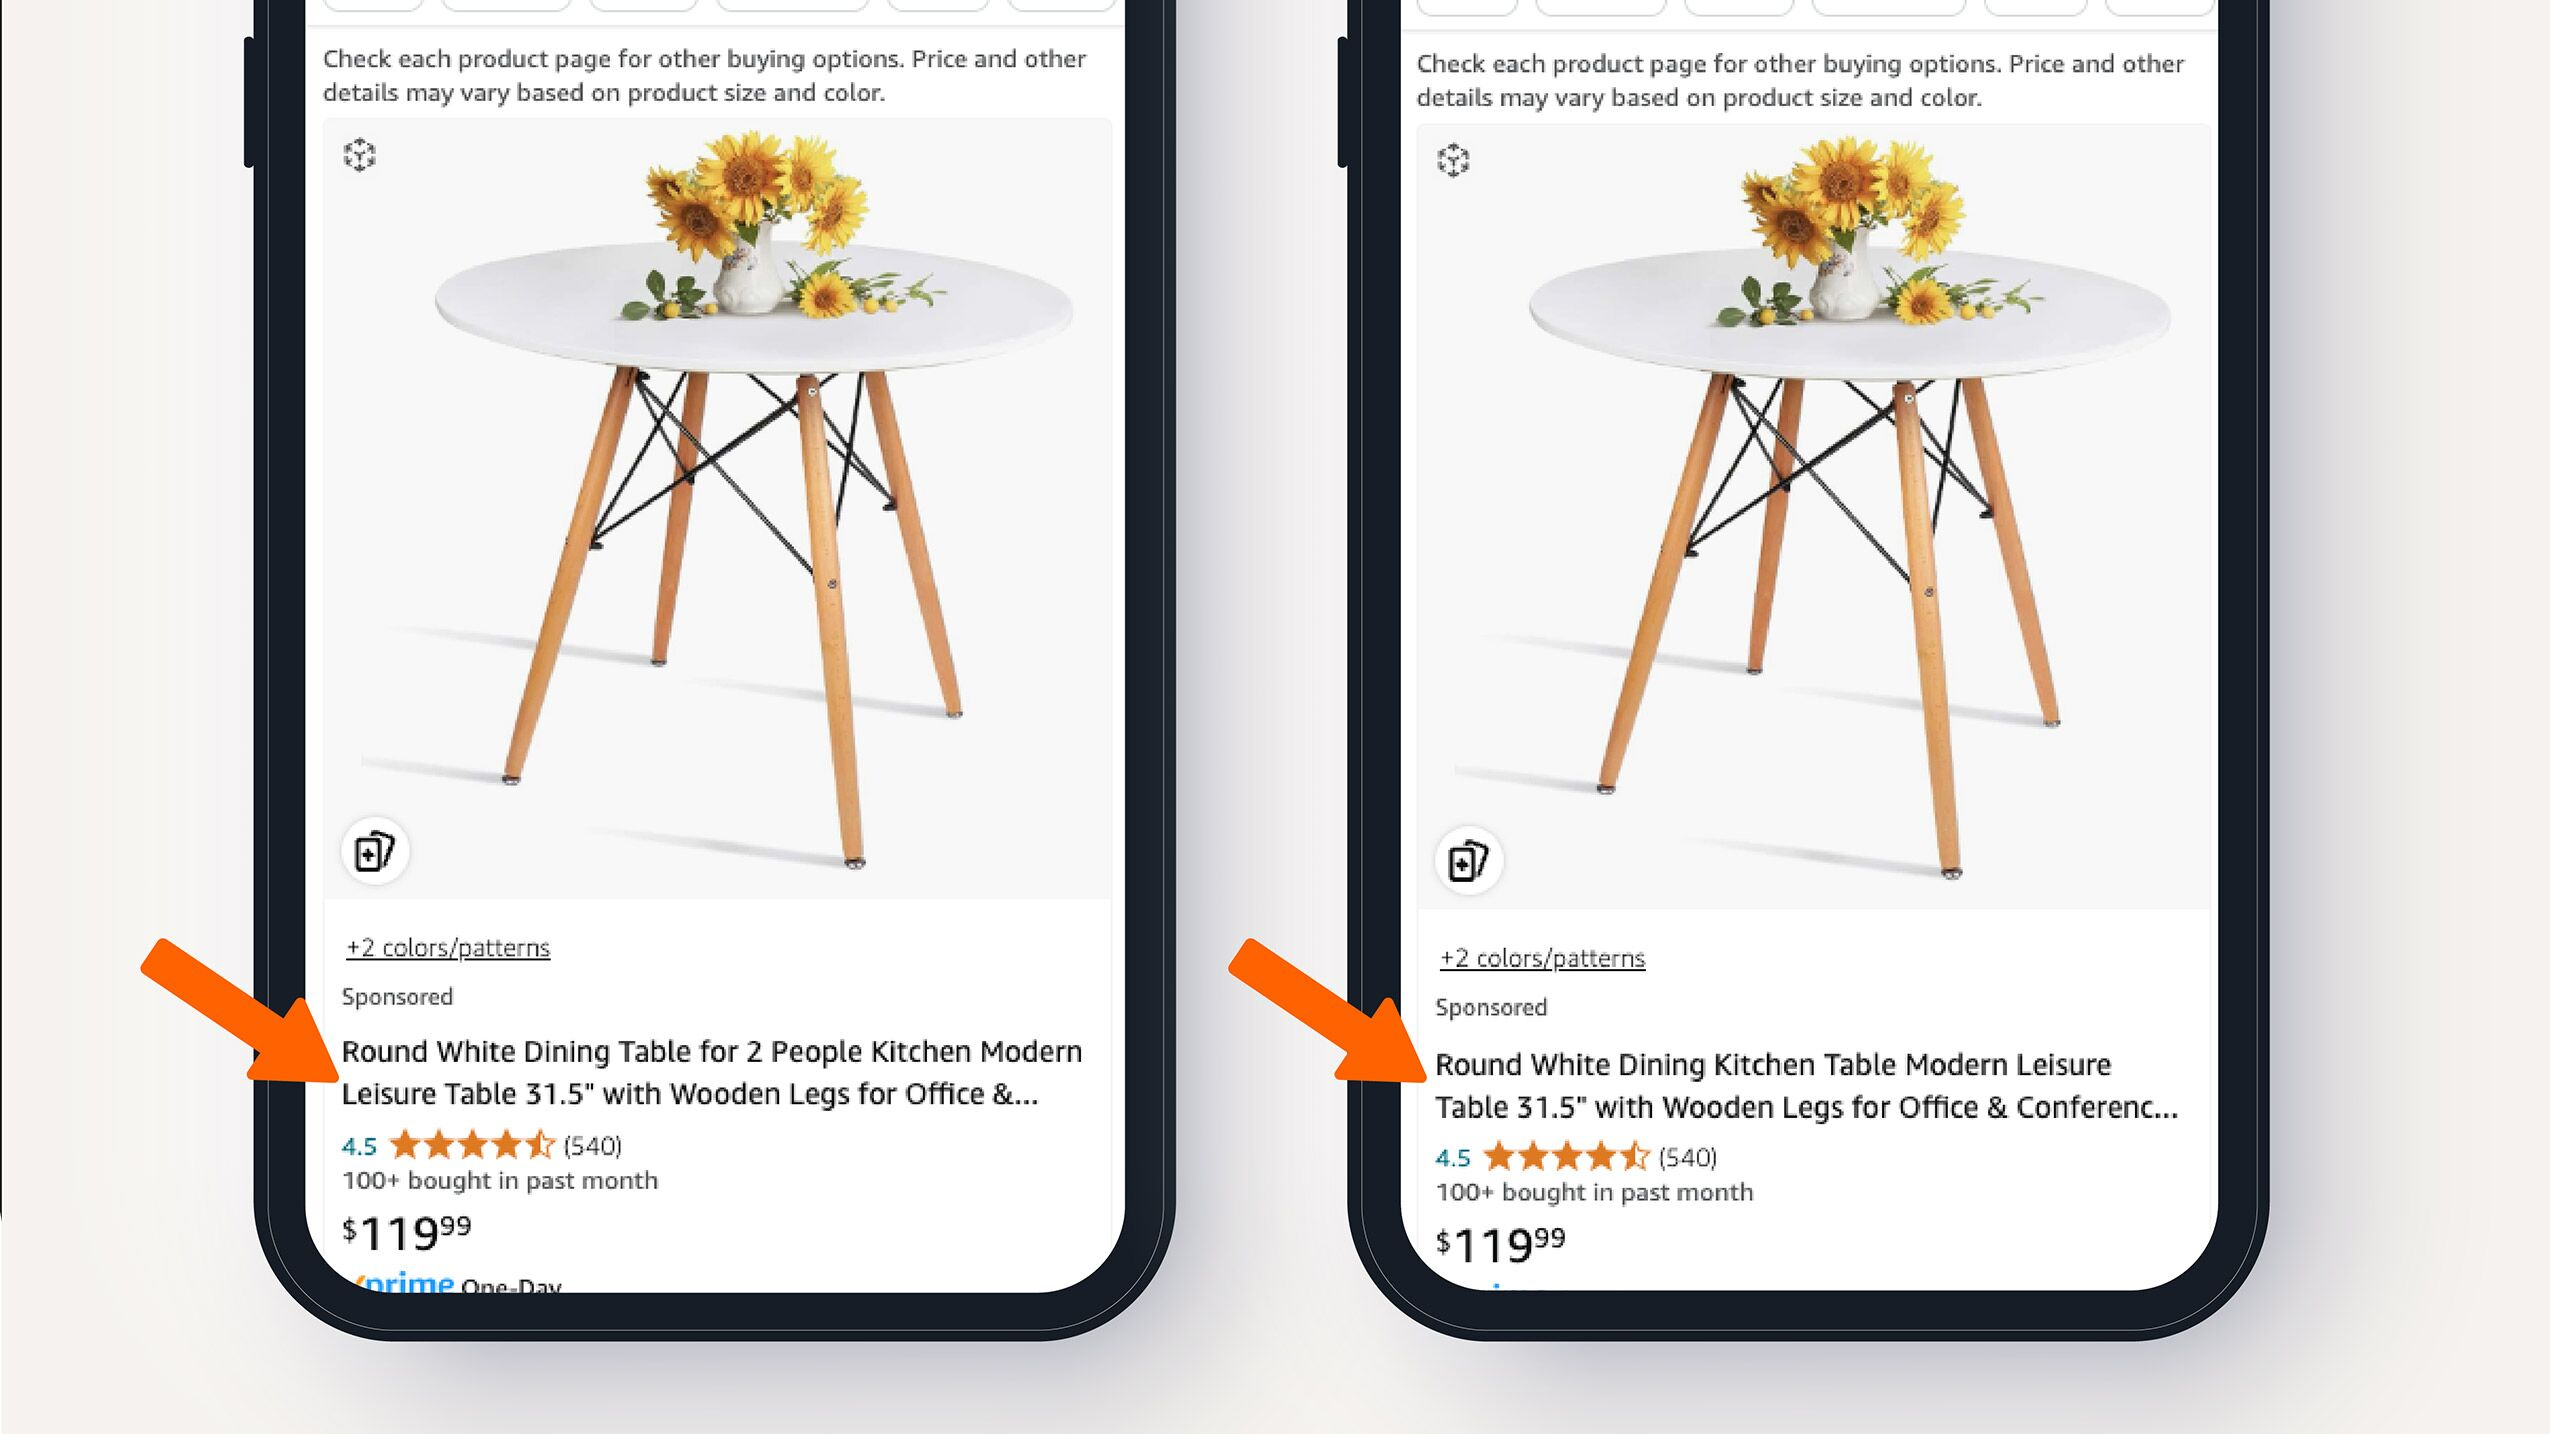

In [ ]:
personalized recommendation
    - "more like this" = "Gift boxes in time for Mother's Day"

improved search results
    - dynamically adjust product descriptions
    - "gluten-free products" = "gluten-free" is highlighted

### Model Quantization & Pruning
